In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


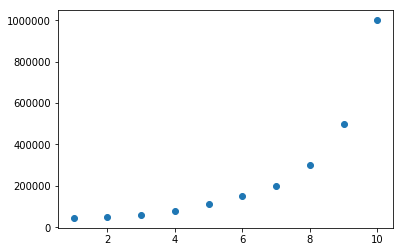

In [8]:
plt.scatter(df.Level, df.Salary)

In [12]:
y = df.Salary
X = df.drop(columns=['Salary', 'Position'])

In [13]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [14]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [48]:
X = sm.add_constant(X)
X['L2'] = df.Level ** 2

In [49]:
X

,const,Level,L2
0,1.0,1,1
1,1.0,2,4
2,1.0,3,9
3,1.0,4,16
4,1.0,5,25
5,1.0,6,36
6,1.0,7,49
7,1.0,8,64
8,1.0,9,81
9,1.0,10,100


In [50]:
model = sm.OLS(y, X)
results = model.fit()

In [51]:
results.summary()

/Users/chyld/.conda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     38.27
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           0.000170
Time:                        01:56:37   Log-Likelihood:                -127.36
No. Observations:                  10   AIC:                             260.7
Df Residuals:                       7   BIC:                             261.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.322e+05   1.16e+05      2.009      0.085   -4.11e+04    5.05e+05
Level      -1.329e+05   4.83e+04     -2.753      0.028   -2.47e+05   -1.87e+04
L2          1.943e+04   4276.317      4.544      0.003    9319.935    2.95e+04
==============================================================================
Omnibus:                        0.268   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.413
Skew:                           0.164   Prob(JB):                        0.813
Kurtosis:                       2.059   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
results.params

const    232166.666667
Level   -132871.212121
L2        19431.818182
dtype: float64

In [53]:
y_hat = results.predict(X)

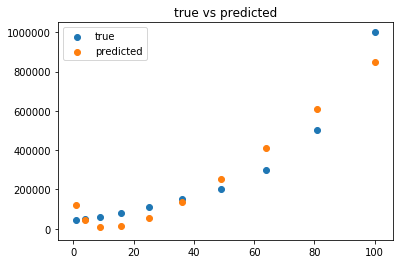

In [56]:
plt.scatter(X.L2, y, label='true')
plt.scatter(X.L2, y_hat, label='predicted')
plt.title('true vs predicted')
plt.legend()